This notebook compares the different collaborative filtering approaches - item-item based vs user-user based. It also compares the different similarity methods such as Baseline, Mean score, Z-score using surprise library. 

In [1]:
from surprise import SVD, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import accuracy
from surprise.model_selection import train_test_split

In [2]:
# Load the movielens-1M dataset
data = Dataset.load_builtin('ml-1m')

In [3]:
# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.20)

In [4]:
def recommendation(algo, trainset, testset):
  # Train the algorithm on the trainset, and predict ratings for the testset
  algo.fit(trainset)
  predictions = algo.test(testset)

  # Then compute RMSE
  accuracy.rmse(predictions)
  # Then compute MAE
  accuracy.mae(predictions)
  return

In [5]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBaseline(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8963
MAE:  0.7043
Done!


In [6]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'cosine'}
algo = KNNBaseline(sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9021
MAE:  0.7124


In [7]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'msd',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBaseline(sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8876
MAE:  0.6962


In [8]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'msd'}
algo = KNNBaseline(sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8966
MAE:  0.7071


In [9]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'pearson',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBaseline(sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8916
MAE:  0.7006


In [10]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'pearson'}
algo = KNNBaseline(sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8975
MAE:  0.7073


In [11]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBaseline(sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8602
MAE:  0.6733


In [12]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBaseline(k=60,sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8621
MAE:  0.6755


In [13]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'pearson_baseline'}
algo = KNNBaseline(sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8709
MAE:  0.6814


In [14]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'pearson_baseline'}
algo = KNNBaseline(k=60,sim_options=sim_options)
recommendation(algo, trainset, testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8707
MAE:  0.6817


In [15]:
import matplotlib.pyplot as plt


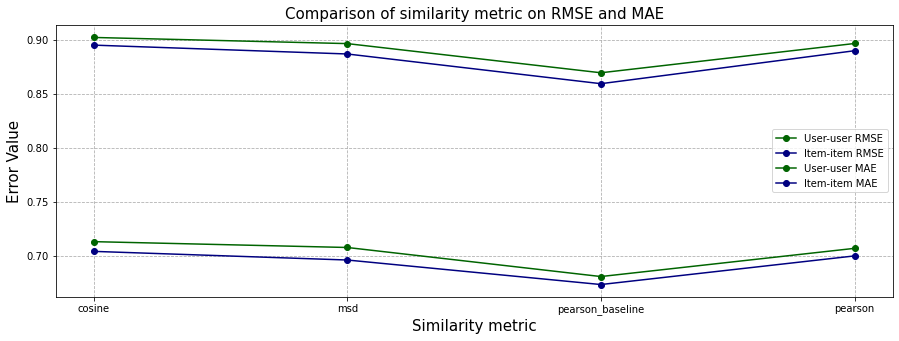

In [16]:
x_algo = ['cosine', 'msd', 'pearson_baseline', 'pearson']

user_rmse = [0.9024, 0.8967, 0.8697, 0.8968]
item_rmse = [0.8953,  0.8871,0.8596, 0.8901 ]

user_mae = [0.7134, 0.7080, 0.6811, 0.7072]
item_mae = [0.7044,  0.6964,0.6737, 0.7002 ]

plt.figure(figsize=(15,5))

# plt.subplot(1, 2, 1)
plt.title('Comparison of similarity metric on RMSE and MAE', loc='center', fontsize=15)
plt.plot(x_algo, user_rmse, label='User-user RMSE', color='darkgreen', marker='o')
plt.plot(x_algo, item_rmse, label='Item-item RMSE', color='navy', marker='o')
plt.xlabel('Similarity metric', fontsize=15)
plt.ylabel('Error Value', fontsize=15)
# plt.legend()
# plt.grid(ls='dashed')
# plt.show()

# plt.subplot(1, 2, 1)
# plt.figure(figsize=(15,5))
# plt.title('Comparison of similarity metric on MAE', loc='center', fontsize=15)
plt.plot(x_algo, user_mae, label='User-user MAE', color='darkgreen', marker='o')
plt.plot(x_algo, item_mae, label='Item-item MAE', color='navy', marker='o')
# plt.xlabel('Similarity metric', fontsize=15)
# plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()